# Data Exploration



## 1. Looking at the Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#load the cleaned datasets
data_train =  pd.read_csv("data_train.csv")
data_test = pd.read_csv("data_test.csv")

print(data_train.head())
#print(data_test.head())


   age         workclass  fnlwgt  education  educational_num  \
0   39         State-gov   77516  Bachelors               13   
1   50  Self-emp-not-inc   83311  Bachelors               13   
2   38           Private  215646    HS-grad                9   
3   53           Private  234721       11th                7   
4   28           Private  338409  Bachelors               13   

       marital-status         occupation   relationship   race  gender  \
0       Never-married       Adm-clerical  Not-in-family  White    Male   
1  Married-civ-spouse    Exec-managerial        Husband  White    Male   
2            Divorced  Handlers-cleaners  Not-in-family  White    Male   
3  Married-civ-spouse  Handlers-cleaners        Husband  Black    Male   
4  Married-civ-spouse     Prof-specialty           Wife  Black  Female   

   capital-gain  capital-loss  hours-per-week native-country  income  
0          2174             0              40  United-States       0  
1             0             

In this cleaned datasets train and test, the income attribute were transformed 0 to be <=50k and 1 to be >50k

In [2]:
dfx = pd.DataFrame(data_train, columns = ['age', 'workclass', 'fnlwgt', 'education', 'educational_num', 'marital-status', 'occupation', 'relationship','race', 'gender', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'], )
dfy = pd.DataFrame(data_train, columns = ['income'])

#print(data_train)
#print (dfx)
#print (dfy)


The content of this dataframe

In [3]:
data_train.head()

,age,workclass,fnlwgt,education,educational_num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


Looking at some stastistics of the dataframe - for the numeric attribute

In [4]:
data_train.shape

(32561, 15)

Looking at the data type of each attribute

In [5]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              32561 non-null  int64 
 1   workclass        32561 non-null  object
 2   fnlwgt           32561 non-null  int64 
 3   education        32561 non-null  object
 4   educational_num  32561 non-null  int64 
 5   marital-status   32561 non-null  object
 6   occupation       32561 non-null  object
 7   relationship     32561 non-null  object
 8   race             32561 non-null  object
 9   gender           32561 non-null  object
 10  capital-gain     32561 non-null  int64 
 11  capital-loss     32561 non-null  int64 
 12  hours-per-week   32561 non-null  int64 
 13  native-country   32561 non-null  object
 14  income           32561 non-null  int64 
dtypes: int64(7), object(8)
memory usage: 3.7+ MB


Looking at the statistics of the dataframe - for the numeric attributes

In [6]:
data_num = data_train.drop(["educational_num","income"], axis=1)
#axis=1: we want to drop columns rather than rows
data_num.describe()

,age,fnlwgt,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,99999.000000,4356.000000,99.000000


Looking at some statistics of the dataframe - for the categorical attribute

In [7]:
data_train.describe(include=["O"])
#the ["O"] is to include the parameter only column with dtype "object"
#i.e., columns that contain string or mixed data types

,workclass,education,marital-status,occupation,relationship,race,gender,native-country
count,32561,32561,32561,32561,32561,32561,32561,32561
unique,8,16,7,14,6,5,2,41
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States
freq,24532,10501,14976,5983,13193,27816,21790,29753


## 2. Visualysing the Data Attributes and its Correlation

Adapted from kaggle: [Simple EDA for Beginner](https://www.kaggle.com/code/alokevil/simple-eda-for-beginners#5.-EDA)

### 2.1 Distribution for numeric attributes

This will include six attribute which are:

1. age
2. fnlwgt
3. education-num
4. hours-per-week
5. capital-gain
6. capital-loss

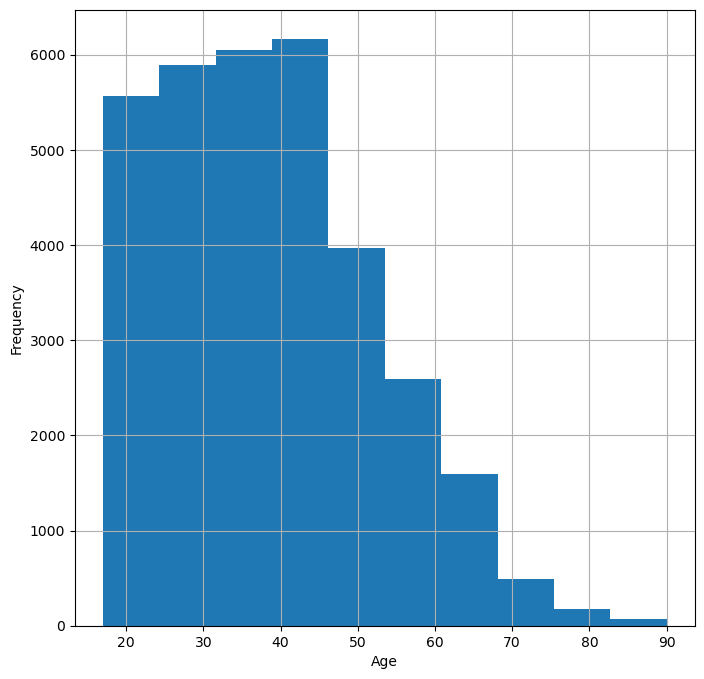

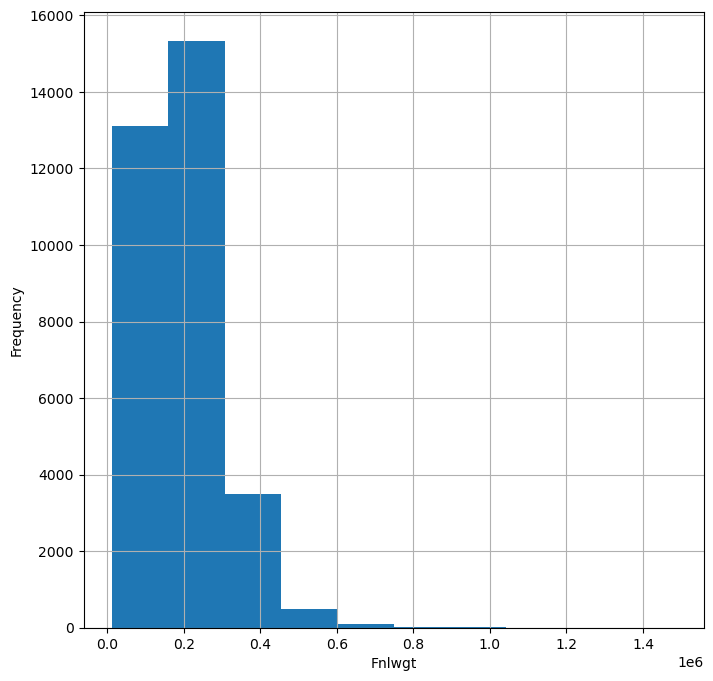

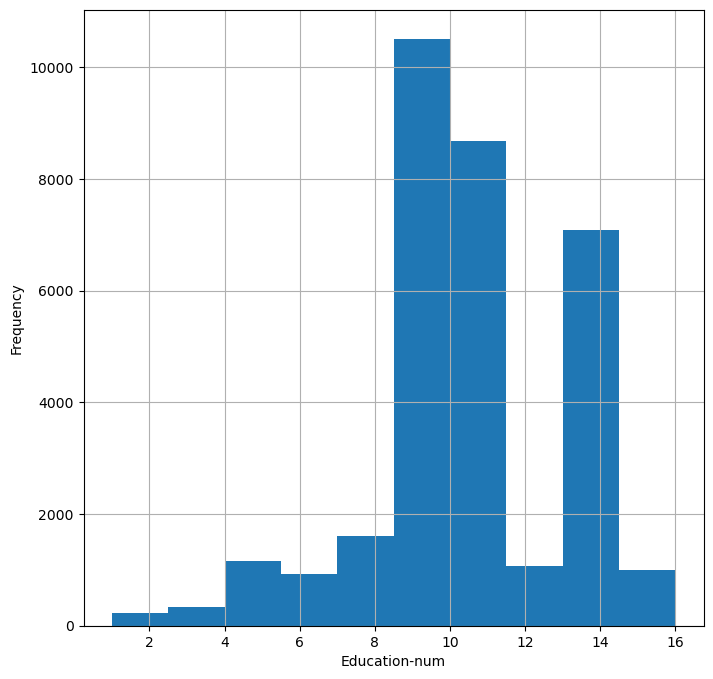

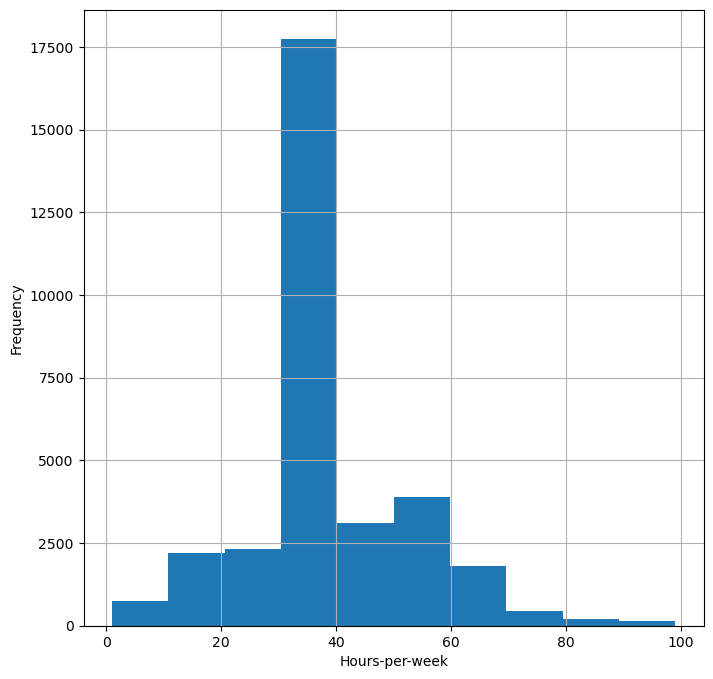

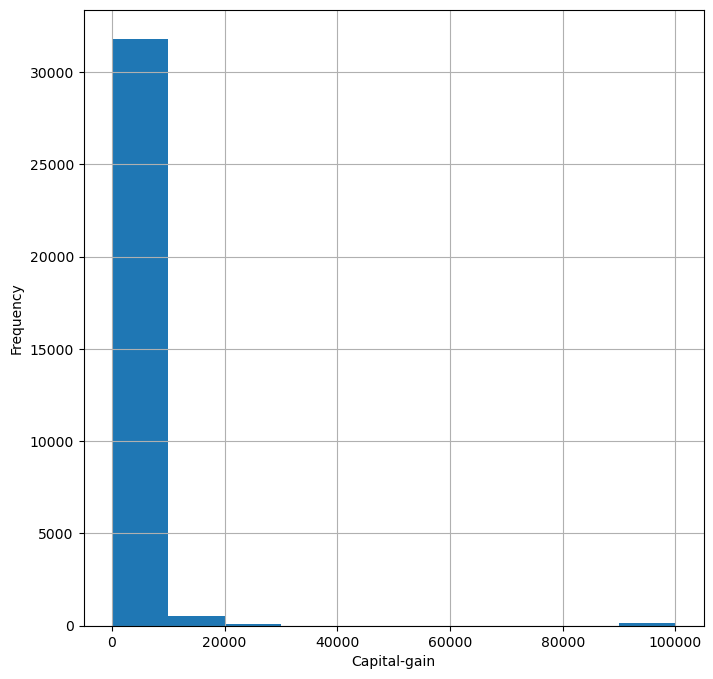

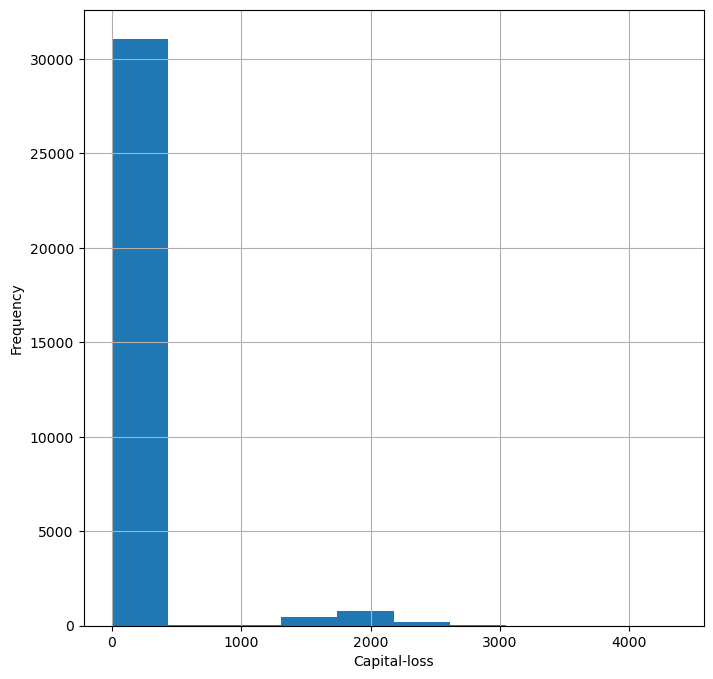

In [8]:
#age
data_train['age'].hist(figsize=(8,8))
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()
#plt.savefig('age_histogram.jpg') -dont know how to output to the right folder

#fnlwgt
data_train['fnlwgt'].hist(figsize=(8,8))
plt.xlabel('Fnlwgt')
plt.ylabel('Frequency')
plt.show()

#educational-num
data_train['educational_num'].hist(figsize=(8,8))
plt.xlabel('Education-num')
plt.ylabel('Frequency')
plt.show()

#hours-per-week
data_train['hours-per-week'].hist(figsize=(8,8))
plt.xlabel('Hours-per-week')
plt.ylabel('Frequency')
plt.show()

#capital-gain
data_train['capital-gain'].hist(figsize=(8,8))
plt.xlabel('Capital-gain')
plt.ylabel('Frequency')
plt.show()

#capital-loss
data_train['capital-loss'].hist(figsize=(8,8))
plt.xlabel('Capital-loss')
plt.ylabel('Frequency')
plt.show()

### 2.2 Distribution for categorical attribute

This include 8 attribute which are:

1. workclass
2. education
3. marital-status
4. occupation
5. relationship
6. race
7. sex
8. native country

education-num too? - (i think educationa and education-num is redundant)


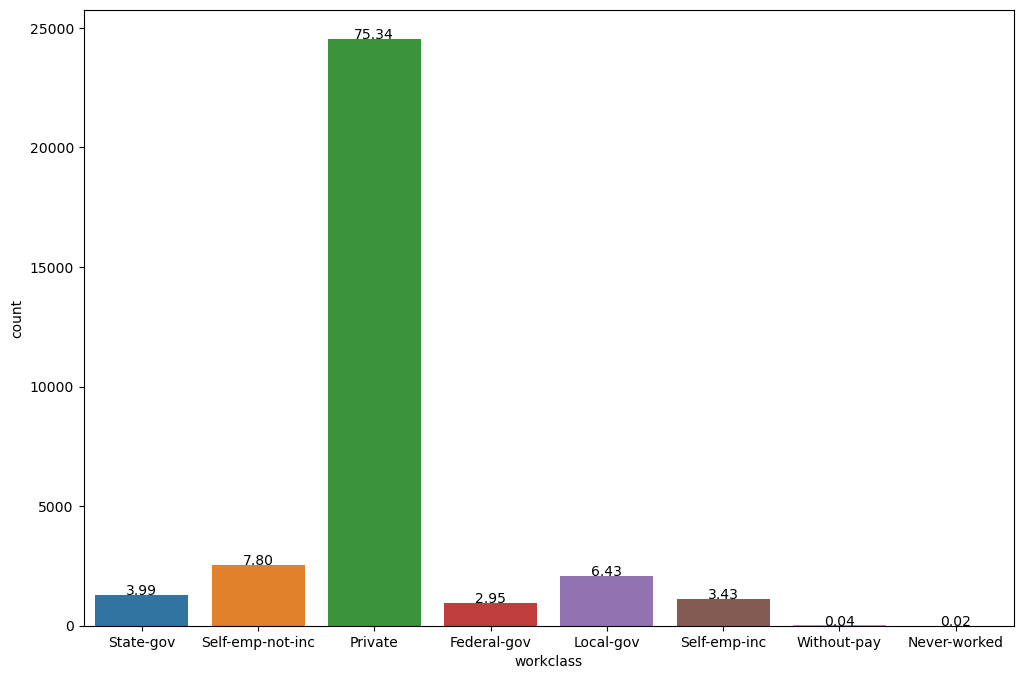

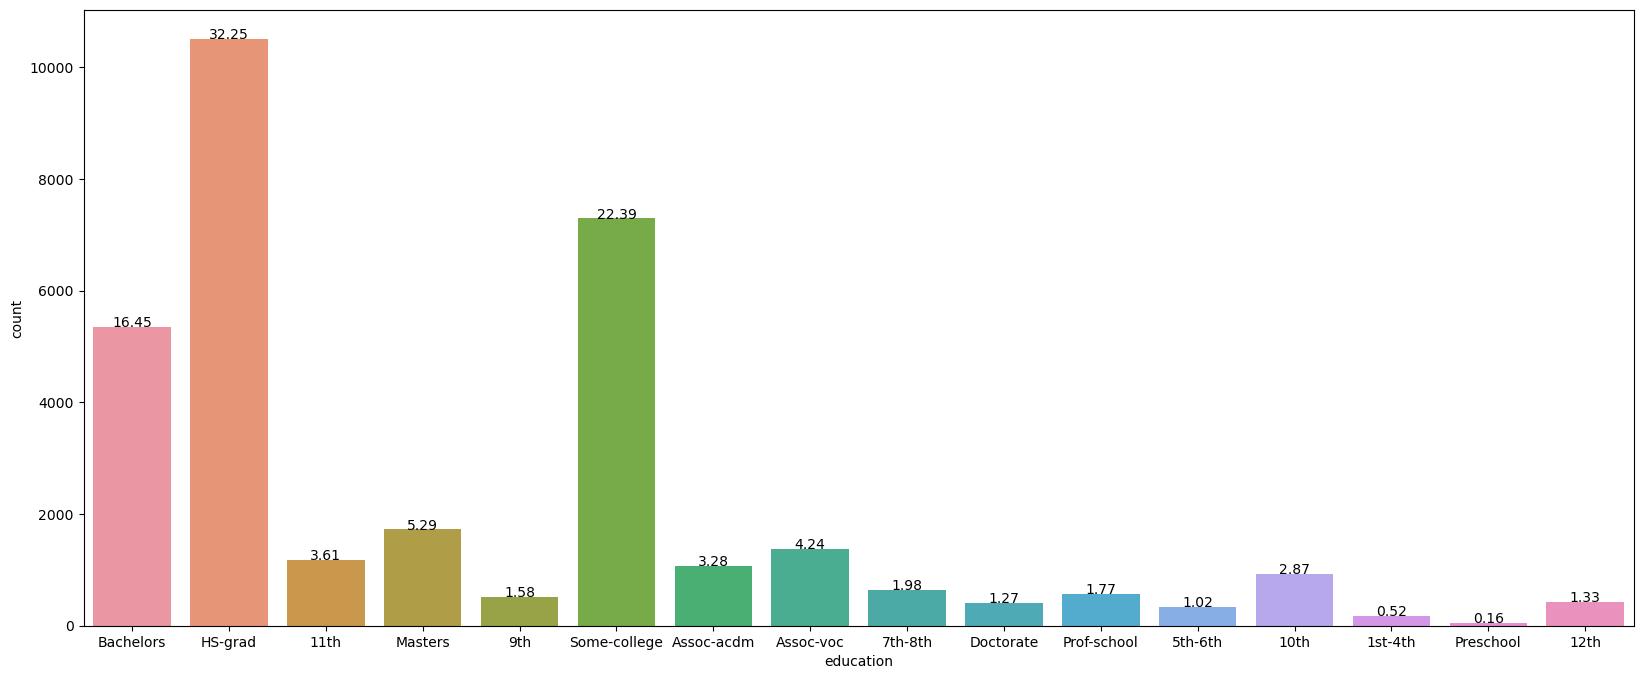

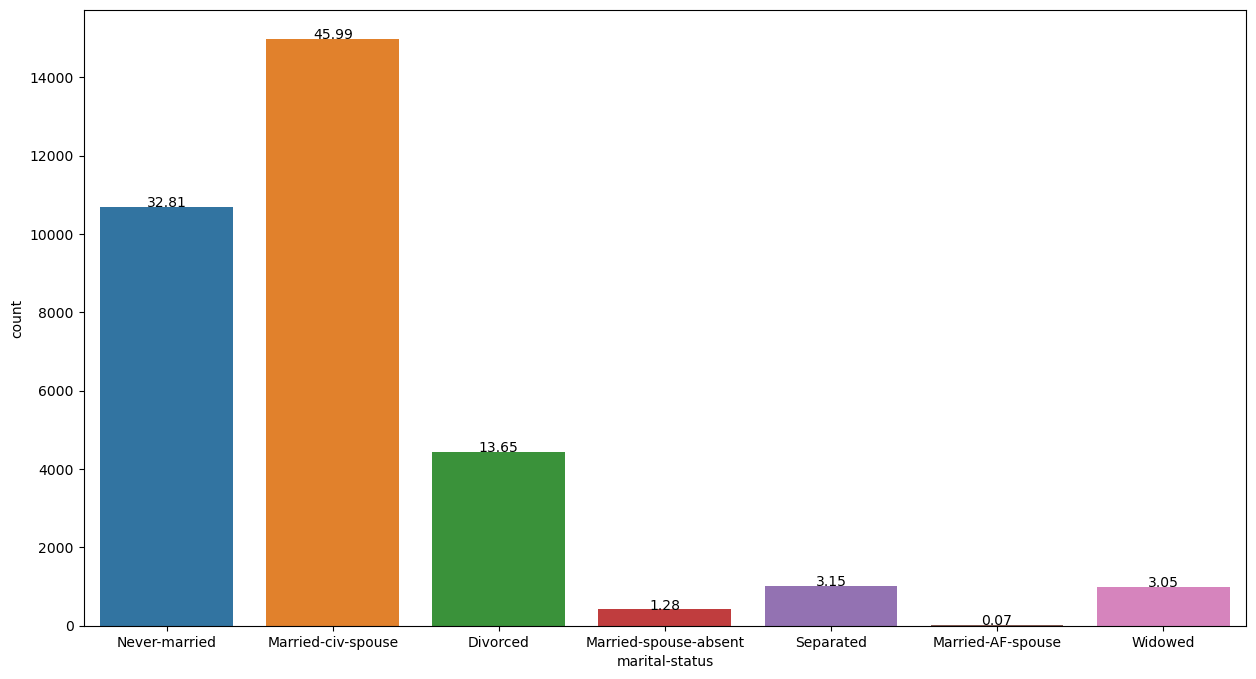

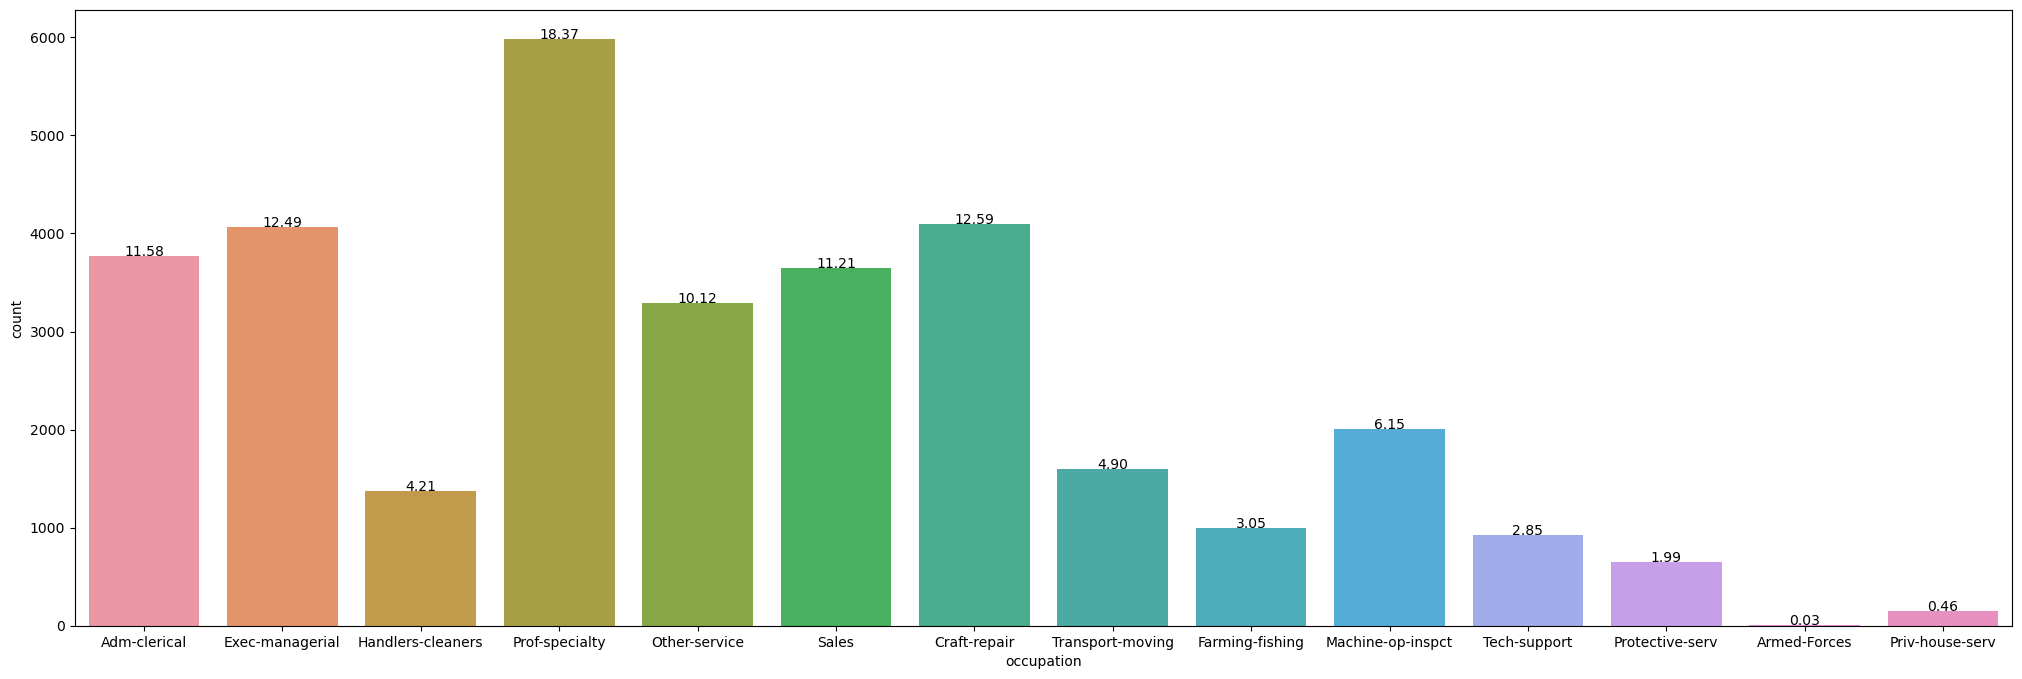

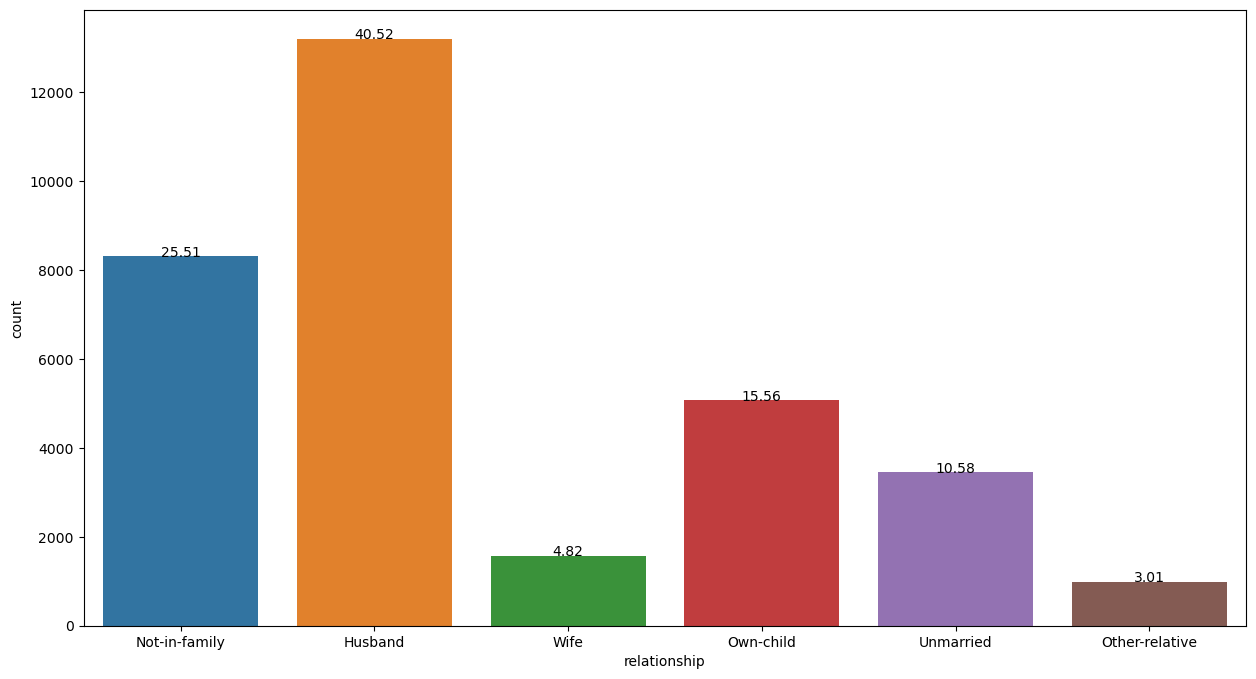

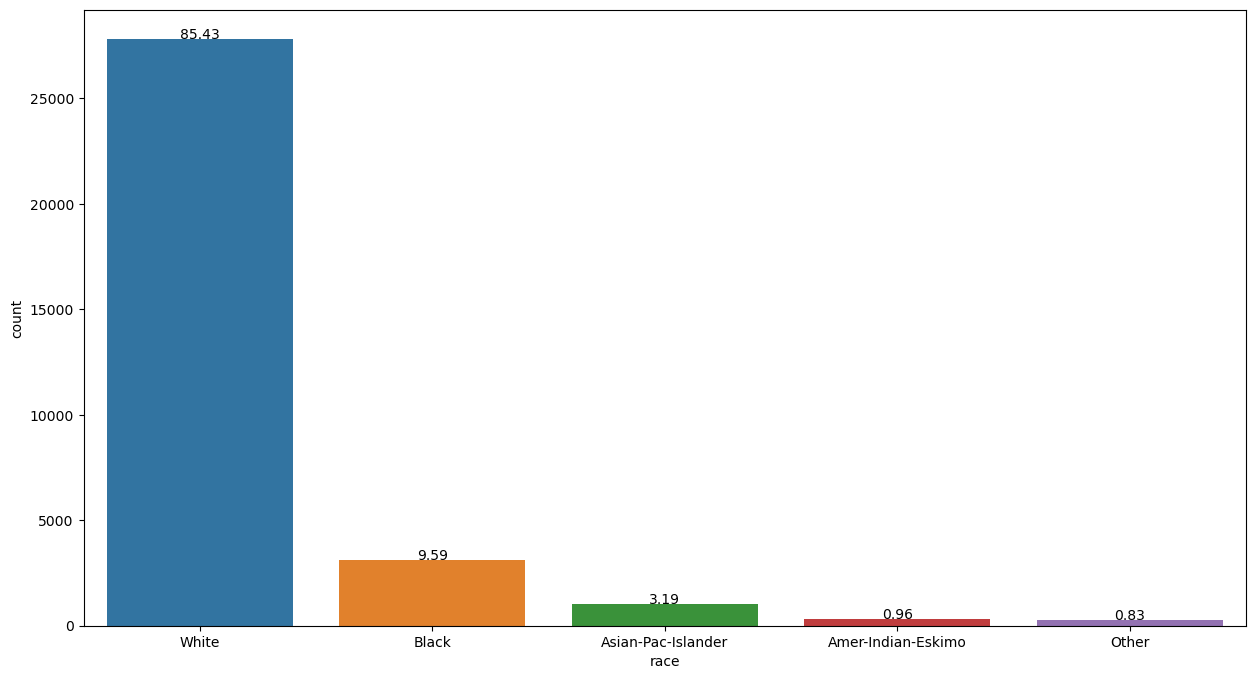

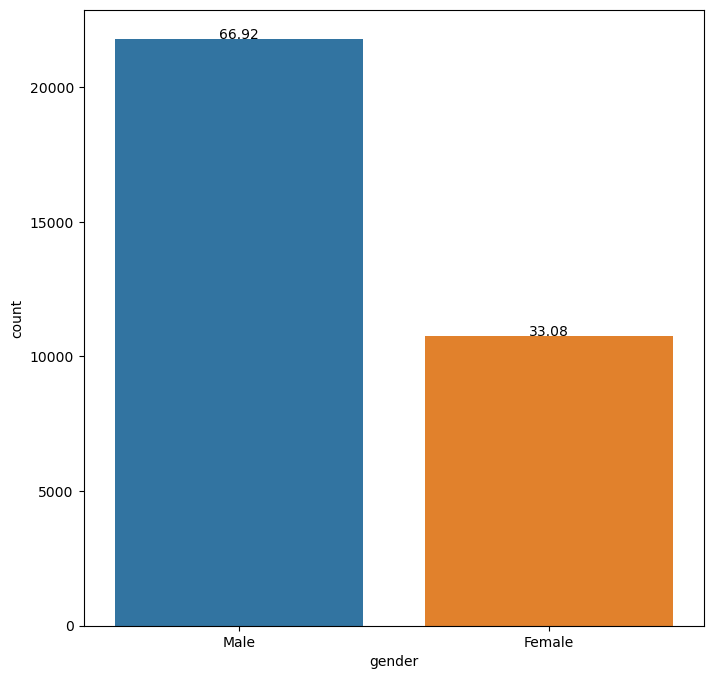

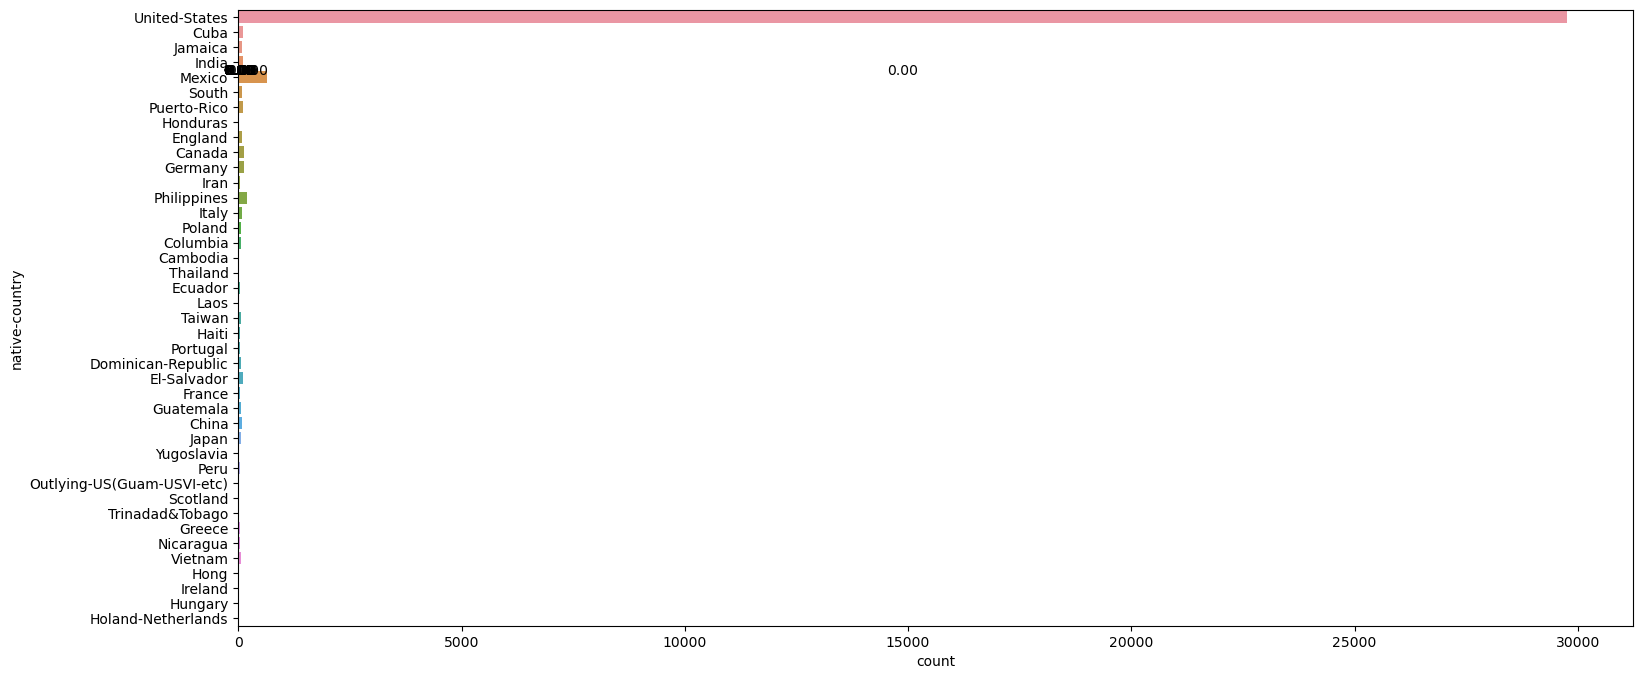

In [9]:
#workclass
plt.figure(figsize=(12,8))

total = float(len(data_train["income"]) )

ax = sns.countplot(x="workclass", data=data_train)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 
plt.show()


#education
plt.figure(figsize=(20,8))
total = float(len(data_train["income"]) )

ax = sns.countplot(x="education", data=data_train)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 
plt.show()

#marital-status
plt.figure(figsize=(15,8))
total = float(len(data_train))

ax = sns.countplot(x="marital-status", data=data_train)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 
plt.show()


#occupation
plt.figure(figsize=(25,8))
total = float(len(data_train) )

ax = sns.countplot(x="occupation", data=data_train)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 
plt.show()


#relationship
plt.figure(figsize=(15,8))
total = float(len(data_train) )

ax = sns.countplot(x="relationship", data=data_train)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 
plt.show()


#race
plt.figure(figsize=(15,8))
total = float(len(data_train) )

ax = sns.countplot(x="race", data=data_train)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 
plt.show()


#gender
plt.figure(figsize=(8,8))
total = float(len(data_train) )

ax = sns.countplot(x="gender", data=data_train)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 
plt.show()


#native-country
plt.figure(figsize=(18,8))
total = float(len(data_train) )

ax = sns.countplot(y="native-country", data=data_train)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 
plt.show()


## 3. Visualysing the distribution of Income (0:<=50k and 1:>50k)


In [10]:
#describing the target income
dfy.describe()

,income
count,32561.000000
mean,0.240810
std,0.427581
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [11]:
dfy.value_counts("income")

income
0    24720
1     7841
dtype: int64

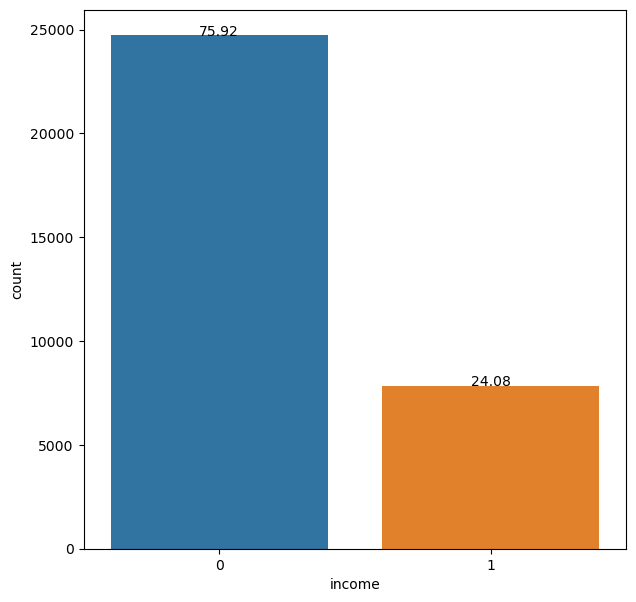

In [12]:

#plotting the histogram
plt.figure(figsize=(7,7))
total = float(len(data_train) )

ax = sns.countplot(x="income", data=data_train)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 
plt.show()

## 4. Data Transformation


In [13]:
from sklearn.preprocessing import LabelEncoder


# Select the categorical columns to encode
cat_columns = ["workclass", "education", "marital-status", "occupation", "relationship", "race", "gender", "native-country"]

# Encode categorical columns using Label Encoding for data_train
le = LabelEncoder()
for col in cat_columns:
    data_train[col] = le.fit_transform(data_train[col])

# Encode categorical columns using Label Encoding for data_test
le = LabelEncoder()
for col in cat_columns:
    data_test[col] = le.fit_transform(data_test[col])


# Print the first 5 rows of the transformed dataset
print(data_train.head())
#print(data_test.head())



   age  workclass  fnlwgt  education  educational_num  marital-status  \
0   39          6   77516          9               13               4   
1   50          5   83311          9               13               2   
2   38          3  215646         11                9               0   
3   53          3  234721          1                7               2   
4   28          3  338409          9               13               2   

   occupation  relationship  race  gender  capital-gain  capital-loss  \
0           0             1     4       1          2174             0   
1           3             0     4       1             0             0   
2           5             1     4       1             0             0   
3           5             0     2       1             0             0   
4           9             5     2       0             0             0   

   hours-per-week  native-country  income  
0              40              38       0  
1              13              38 

## 5.Correlation betweeen the Attributes

In [14]:
data_train.corr(method='pearson')

,age,workclass,fnlwgt,education,educational_num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
age,1.000000,0.040504,-0.076646,-0.010508,0.036527,-0.266288,0.001739,-0.263698,0.028718,0.088832,0.077674,0.057775,0.068756,-0.000270,0.234037
workclass,0.040504,1.000000,-0.024338,0.004874,0.003536,-0.020468,0.007110,-0.057947,0.048350,0.071584,0.031505,0.002644,0.042199,-0.001625,0.002693
fnlwgt,-0.076646,-0.024338,1.000000,-0.028145,-0.043195,0.028153,0.000188,0.008931,-0.021291,0.026858,0.000432,-0.010252,-0.018768,-0.063286,-0.009463
education,-0.010508,0.004874,-0.028145,1.000000,0.359153,-0.038407,-0.041279,-0.010876,0.014131,-0.027356,0.030046,0.016746,0.055510,0.076060,0.079317
educational_num,0.036527,0.003536,-0.043195,0.359153,1.000000,-0.069304,0.070954,-0.094153,0.031838,0.012280,0.122630,0.079923,0.148123,0.088894,0.335154
marital-status,-0.266288,-0.020468,0.028153,-0.038407,-0.069304,1.000000,0.034962,0.185451,-0.068013,-0.129314,-0.043393,-0.034187,-0.190519,-0.021278,-0.199307
occupation,0.001739,0.007110,0.000188,-0.041279,0.070954,0.034962,1.000000,-0.037451,-0.004839,0.047461,0.018021,0.009680,-0.012879,-0.002217,0.034625
relationship,-0.263698,-0.057947,0.008931,-0.010876,-0.094153,0.185451,-0.037451,1.000000,-0.116055,-0.582454,-0.057919,-0.061062,-0.248974,-0.010712,-0.250918
race,0.028718,0.048350,-0.021291,0.014131,0.031838,-0.068013,-0.004839,-0.116055,1.000000,0.087204,0.011145,0.018899,0.041910,0.116529,0.071846
gender,0.088832,0.071584,0.026858,-0.027356,0.012280,-0.129314,0.047461,-0.582454,0.087204,1.000000,0.048480,0.045567,0.229309,0.002061,0.215980


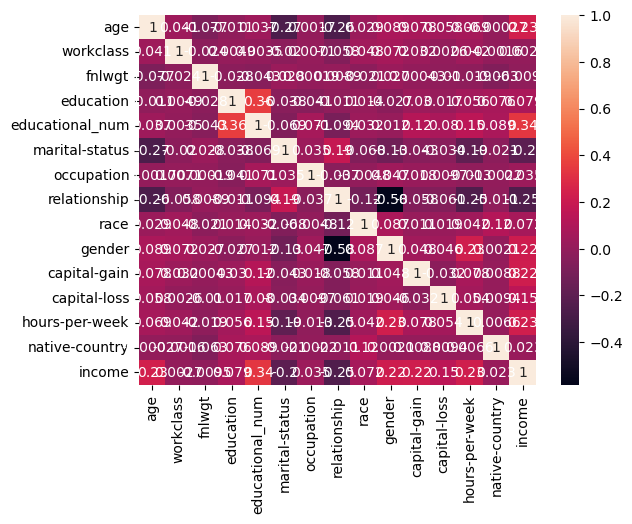

In [15]:
sns.heatmap(data_train.corr(method='pearson'),annot=True);
plt.show()